In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset = pd.read_csv(r'C:\Users\saini\Downloads\Customer-Churn.csv')
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
dataset["TotalCharges"] = dataset["TotalCharges"].replace(" " , "0")
dataset['TotalCharges'] = dataset["TotalCharges"].astype("float")

In [5]:
dataset.isnull().sum().sum()

0

In [6]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
dataset["customerID"].duplicated().sum()

0

In [8]:
def covt(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
dataset["SeniorCitizen"] = dataset["SeniorCitizen"].apply(covt)

In [9]:
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


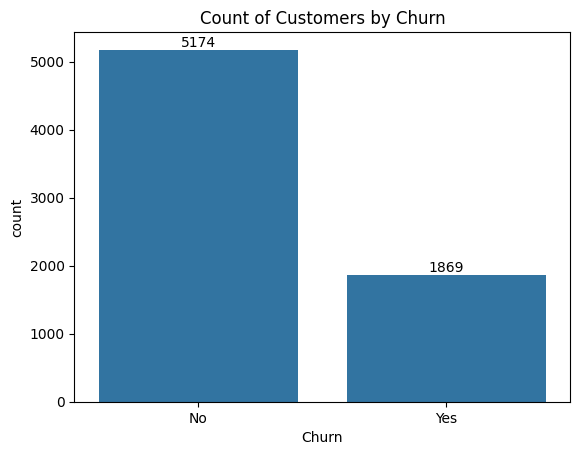

In [10]:
ax = sns.countplot(data = dataset , x="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

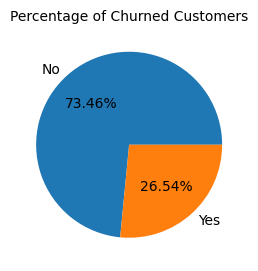

In [11]:
plt.figure(figsize=(3,4))
gb = dataset.groupby("Churn").agg({"Churn" : "count"})
plt.pie(gb["Churn"] , labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers" , fontsize = 10)
plt.show()

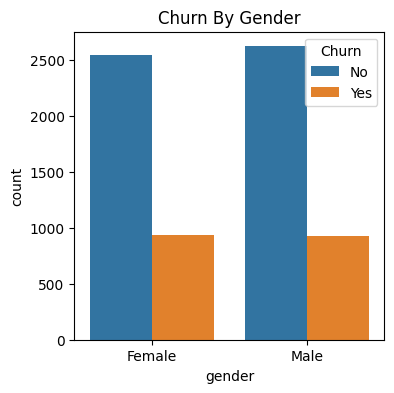

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset , x = "gender" , hue="Churn")
plt.title("Churn By Gender")
plt.show()

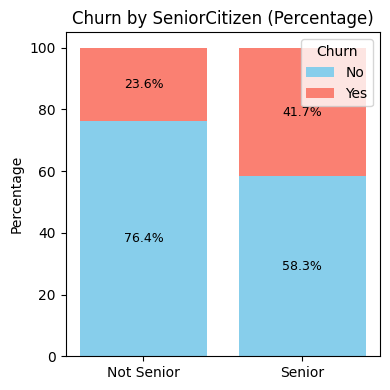

In [13]:
count_data = dataset.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 2: Plot stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))

bottom_vals = [0] * len(percent_data)
colors = ['skyblue', 'salmon']

for idx, churn_val in enumerate(percent_data.columns):
    values = percent_data[churn_val]
    ax.bar(percent_data.index, values, bottom=bottom_vals, label=churn_val, color=colors[idx])
    
    # Step 3: Add labels
    for i, (val, bottom) in enumerate(zip(values, bottom_vals)):
        ax.text(i, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
    
    bottom_vals = [bottom_vals[i] + values.iloc[i] for i in range(len(values))]

# Formatting
ax.set_title('Churn by SeniorCitizen (Percentage)', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Senior', 'Senior'])
ax.set_ylabel('Percentage')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

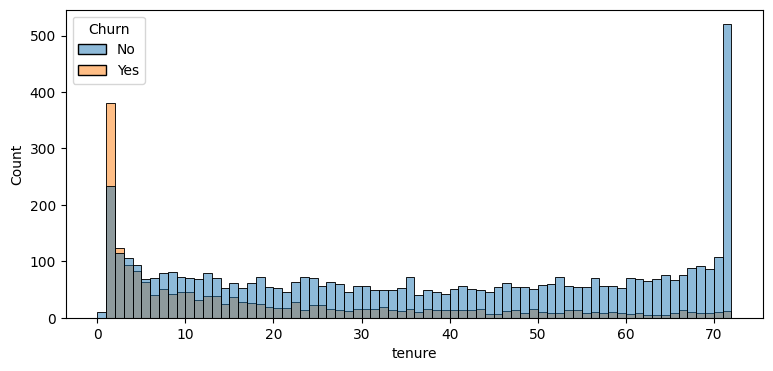

In [14]:
plt.figure(figsize=(9,4))
sns.histplot( x = "tenure" , data= dataset , bins=72 , hue="Churn")
plt.show()

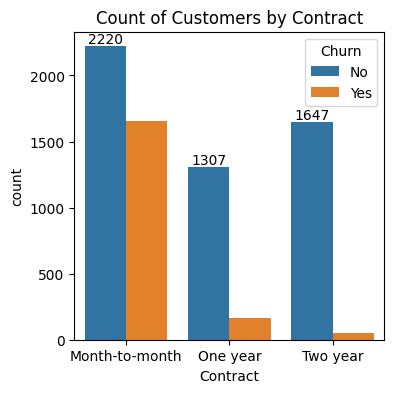

In [15]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data = dataset , x="Contract", hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [16]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

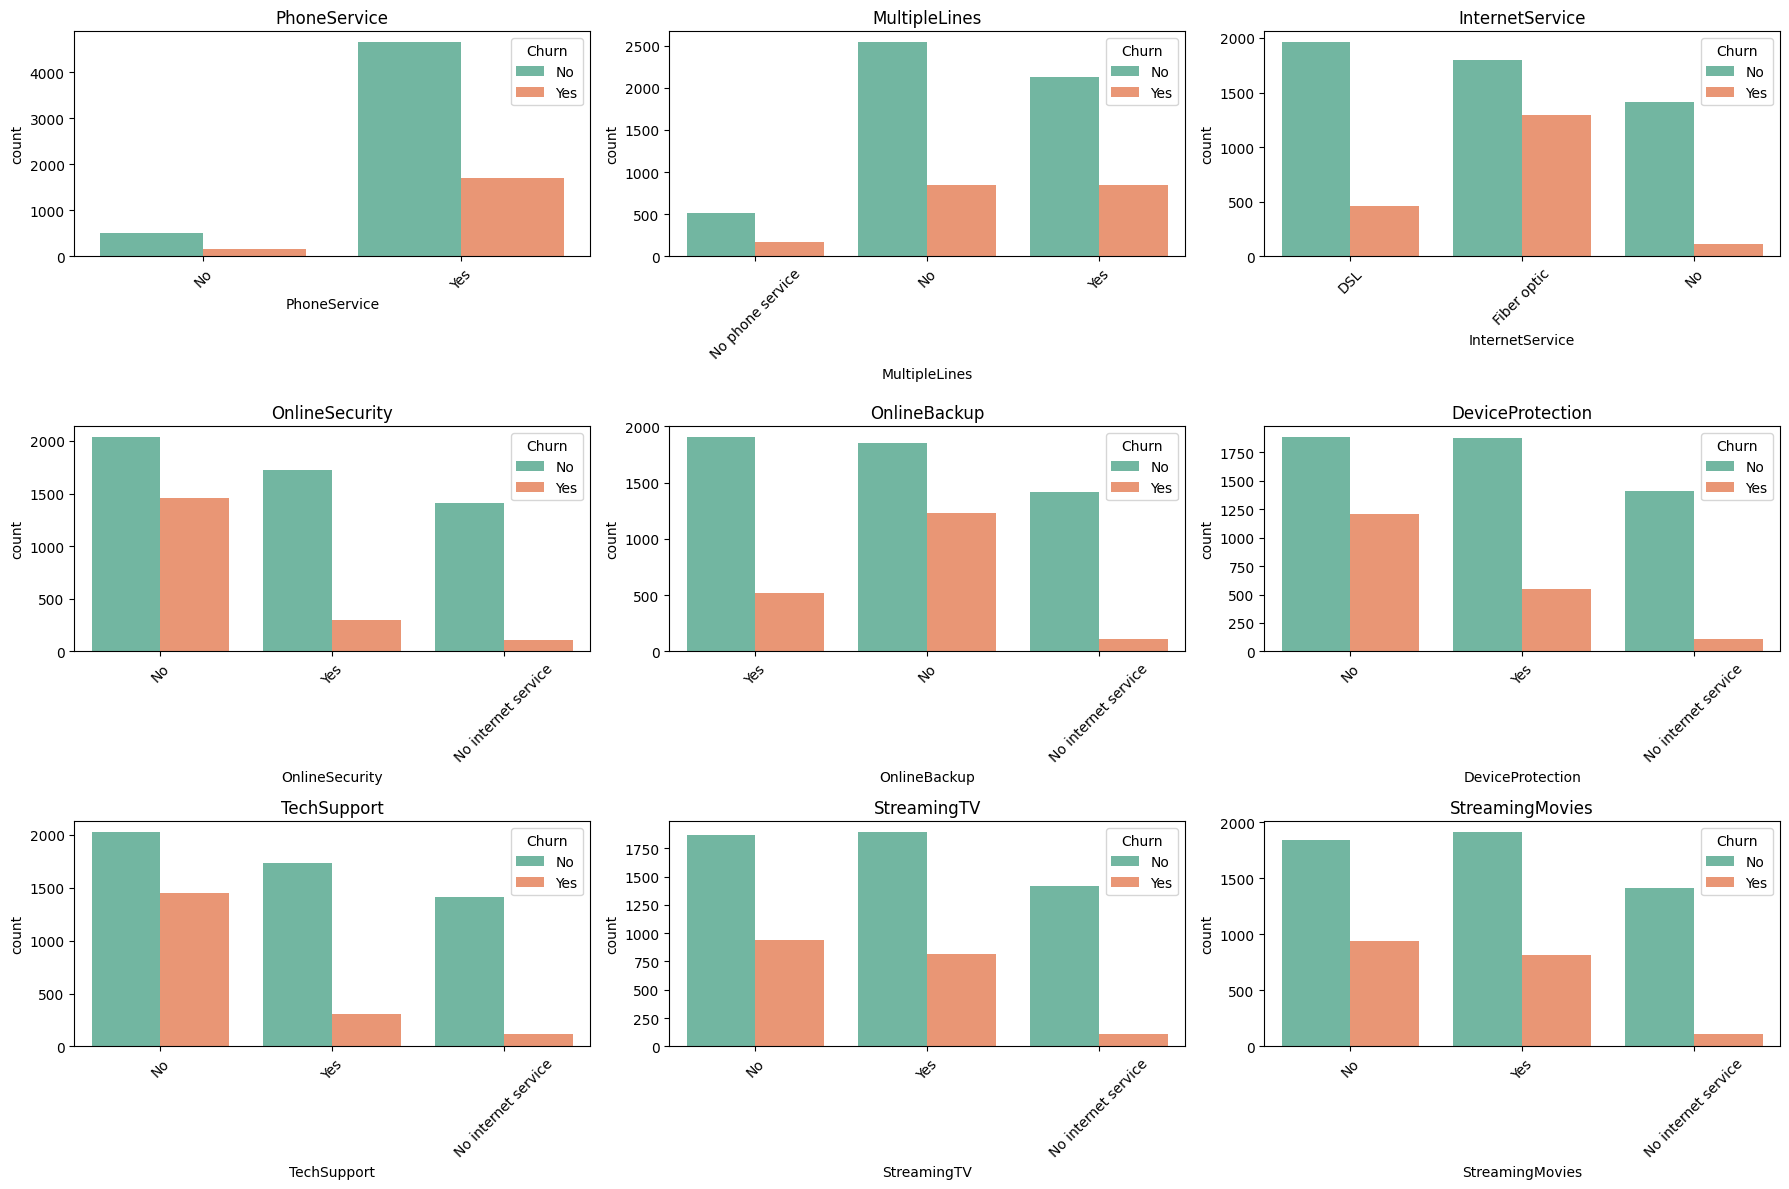

In [19]:
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Determine grid size (e.g., 3x3 for 9 plots)
rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array to 1D for easy indexing

for i, column in enumerate(columns_to_plot):
    sns.countplot(data=dataset, x=column, ax=axes[i], palette='Set2' , hue= dataset["Churn"])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

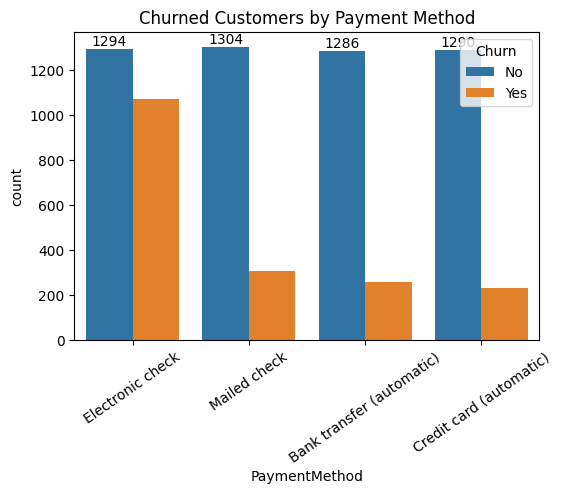

In [23]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data = dataset , x="PaymentMethod", hue= "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 35)
plt.show()